# DRAFT 2020-4-5: INITIALIZATION OF COVID-19 INVESTIGATION

In this notebook, we are going to get everything started to investigate COVID-19 data set. 

### Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
testing = pd.read_csv("/repos/Coronavirus/data/testing.csv")
testing.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,3/31/20,1/29/20,1,0,0,0
1,3/31/20,2/2/20,2,0,0,0
2,3/31/20,2/4/20,1,0,0,0
3,3/31/20,2/5/20,1,0,0,0
4,3/31/20,2/8/20,1,0,0,0


In [3]:
testing = testing.iloc[:, 1:]
testing.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,1/29/20,1,0,0,0
1,2/2/20,2,0,0,0
2,2/4/20,1,0,0,0
3,2/5/20,1,0,0,0
4,2/8/20,1,0,0,0


### Plot: Density of COVID-19 Observation

In [4]:
import matplotlib.pyplot as plt

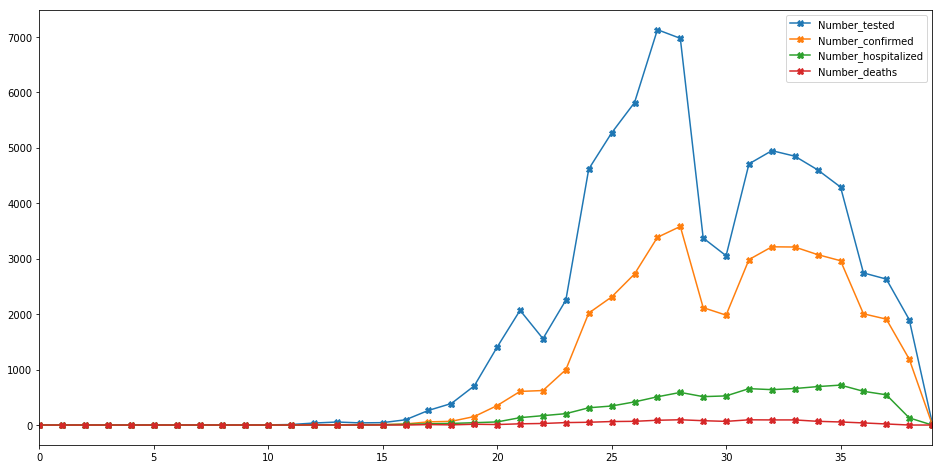

In [5]:
testing.plot(figsize=(16,8), marker="X")
plt.show()

### Introduce Cumulative Distribution

In [6]:
testing['Number_confirmed_cum'] = np.cumsum(testing['Number_confirmed'])
testing['Number_tested_cum'] = np.cumsum(testing['Number_tested'])
testing['Number_hospitalized_cum'] = np.cumsum(testing['Number_hospitalized'])
testing['Number_deaths_cum'] = np.cumsum(testing['Number_deaths'])
testing.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,Number_confirmed_cum,Number_tested_cum,Number_hospitalized_cum,Number_deaths_cum
0,1/29/20,1,0,0,0,0,1,0,0
1,2/2/20,2,0,0,0,0,3,0,0
2,2/4/20,1,0,0,0,0,4,0,0
3,2/5/20,1,0,0,0,0,5,0,0
4,2/8/20,1,0,0,0,0,6,0,0


In [7]:
testing_cum = testing.iloc[:, 5:]
testing_cum.head()

,Number_confirmed_cum,Number_tested_cum,Number_hospitalized_cum,Number_deaths_cum
0,0,1,0,0
1,0,3,0,0
2,0,4,0,0
3,0,5,0,0
4,0,6,0,0


### Plot: Distribution

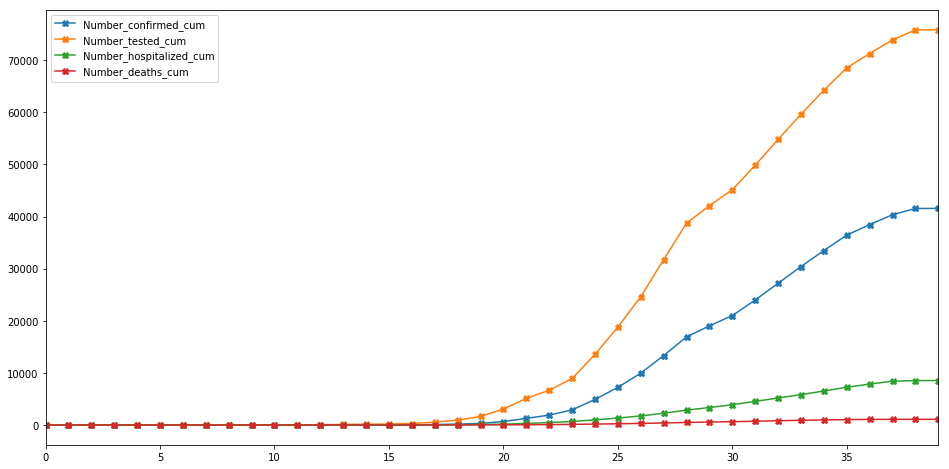

In [8]:
testing_cum.plot(figsize=(16,8), marker="X")
plt.show()

### Simple Linear Model: Build and Train

Let us build a simple linear model to create some preliminary results.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = testing.iloc[:, 1:4]
y = testing['Number_deaths']
X.shape, len(y)

((40, 3), 40)

In [11]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(lm.coef_, lm.intercept_)

[ 0.0080317   0.00485518  0.03472817] -0.36071664257


### Simple Linear Model: Performance

In [13]:
y_hat = np.dot(X, lm.coef_) + lm.intercept_

In [14]:
RMSE = np.round(np.sqrt(np.mean((y_hat - y)**2)), 3)
print('RMSE is', RMSE)

RMSE is 10.256


### Simple Linear Model: Performance Visualization

In [15]:
y_matrix = pd.DataFrame([y, y_hat], index = ['Number_deaths', 'Number_deaths_estimate']).T
y_matrix.head(3)

,Number_deaths,Number_deaths_estimate
0,0.0,-0.352685
1,0.0,-0.344653
2,0.0,-0.352685


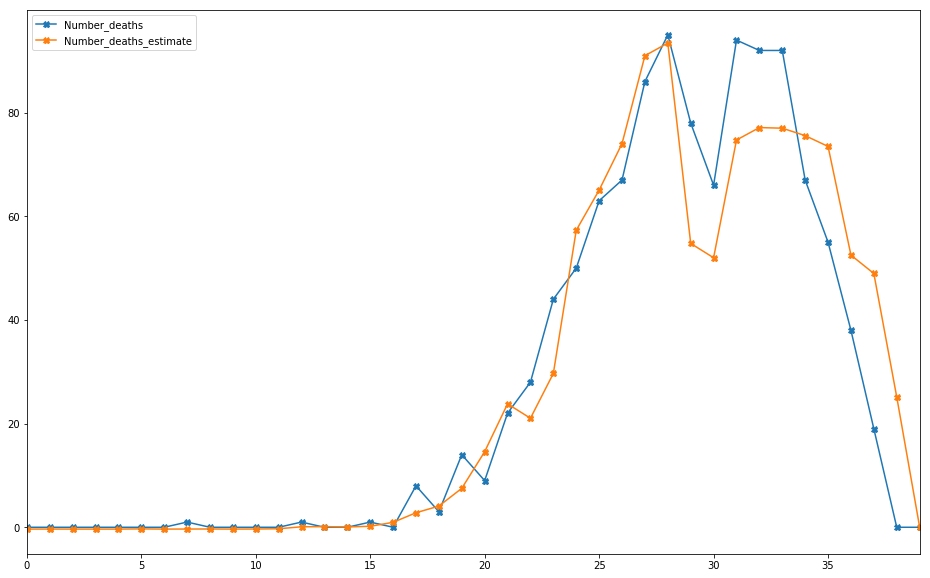

In [16]:
y_matrix.plot(figsize=(16,10), marker="X")
plt.show()

### Improved Linear Model: Build and Train

Let us build a simple linear model to create some preliminary results.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = testing.iloc[:, 1:4]
X['Number_hospitalized_rt'] = X['Number_hospitalized'] ** (0.5)
X['Number_hospitalized_sq'] = X['Number_hospitalized'] ** 2
X['Number_hospitalized_cube'] = X['Number_hospitalized'] ** 3
y = testing['Number_deaths']
X.shape, len(y)

((40, 6), 40)

In [19]:
lm = LinearRegression()
lm.fit(X, y)

print(lm.coef_, lm.intercept_)

[  9.41805581e-03   1.69141013e-03  -8.97340628e-02   6.17065231e-01
   3.63459766e-04  -3.11265036e-07] -0.132459904164


### Simple Linear Model: Performance

In [51]:
y_hat_lm = np.dot(X, lm.coef_) + lm.intercept_

RMSE = np.round(np.sqrt(np.mean((y_hat - y)**2)), 3)
print('RMSE is', RMSE)

RMSE is 10.108


### Simple Linear Model: Performance Visualization

In [52]:
y_matrix = pd.DataFrame([y, y_hat], index = ['Number_deaths', 'Number_deaths_estimate_lm']).T
y_matrix.head(3)

,Number_deaths,Number_deaths_estimate_lm
0,0.0,-0.123042
1,0.0,-0.113624
2,0.0,-0.123042


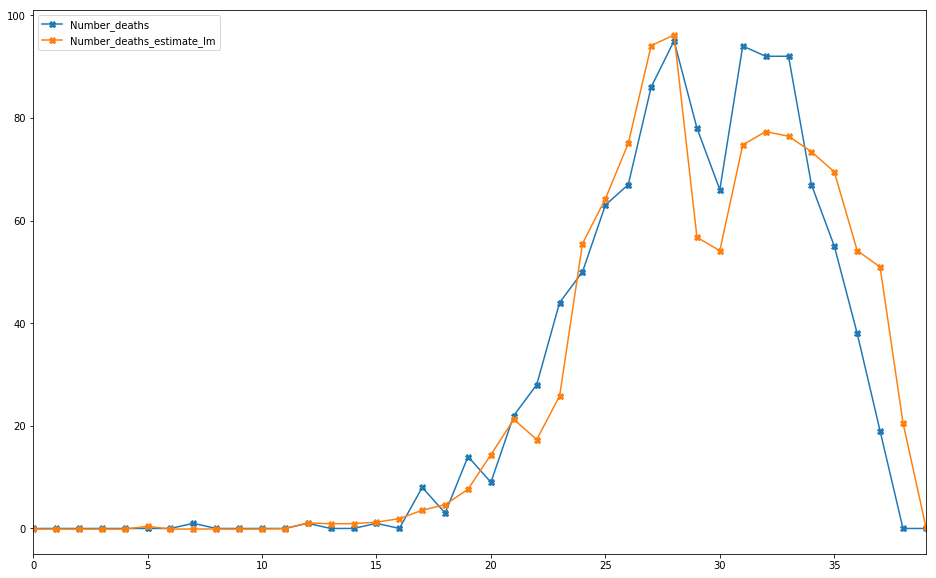

In [53]:
y_matrix.plot(figsize=(16,10), marker="X")
plt.show()

### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
DecTreeRegressor = DecisionTreeRegressor()
DecTreeRegressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
from sklearn.metrics import r2_score
y_hat_tree = DecTreeRegressor.predict(X)
score_train = r2_score(y_hat_tree, y)
RMSE = (score_train/X.shape[0])**(0.5)
print('Model error is', RMSE)

Model error is 0.158113034615


In [54]:
y_matrix['Number_deaths_estimate_tree'] = y_hat_tree

/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


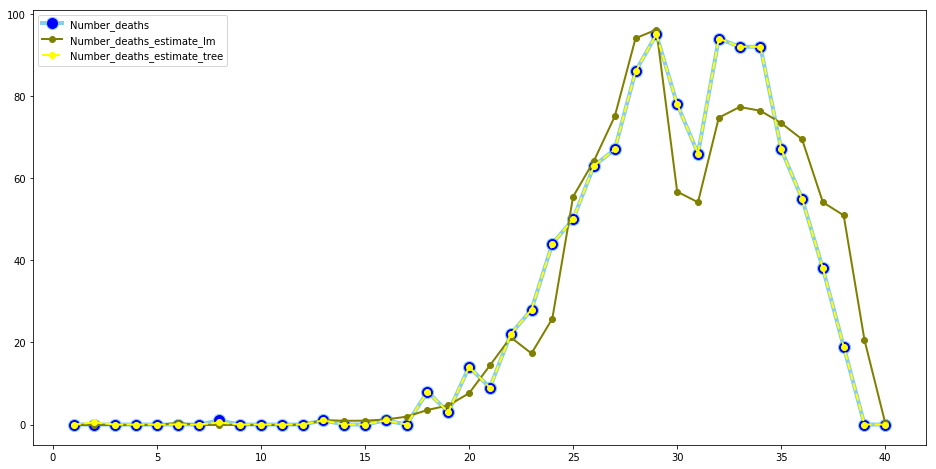

In [73]:
# Data
df=pd.DataFrame({'x': range(1,y_matrix.shape[0]+1), 
                 'y1': y_matrix['Number_deaths'], 
                 'y2': y_matrix['Number_deaths_estimate_lm'], 
                 'y3': y_matrix['Number_deaths_estimate_tree'] })
 
# multiple line plot
plt.figure(figsize=(16,8))
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Number_deaths")
plt.plot( 'x', 'y2', data=df, marker='o', color='olive', linewidth=2, label="Number_deaths_estimate_lm")
plt.plot( 'x', 'y3', data=df, marker='o', color='yellow', linewidth=2, linestyle='dashed', label="Number_deaths_estimate_tree")
plt.legend()
plt.show()

Investigation ends here.